In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [7]:
# use filtered data with no outliers
df = pd.read_csv('2016_filtered.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,2.029158e+09,1.453684e+08,0.020000,0.0191,11.2232,2.969474e+08,0.0000,0.0,70.808086,1,Consumer Defensive
1,8.062470e+08,2.661830e+08,0.124000,0.1342,14.1100,1.763100e+08,0.0000,0.0,-15.842336,0,Consumer Defensive
2,3.593031e+09,2.928850e+08,0.036000,0.1567,5.3760,2.398980e+08,0.0000,0.0,24.935868,1,Consumer Defensive
3,2.994000e+09,5.316000e+08,0.095000,0.2037,9.5890,3.823000e+08,0.0000,7000000.0,53.228119,1,Consumer Defensive
4,3.926885e+09,4.253110e+08,0.042000,0.1353,5.8030,3.565620e+08,0.0314,0.0,0.424386,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1810,1.221660e+08,1.024800e+07,0.034000,0.1060,5.6500,1.098200e+07,0.0000,0.0,34.433957,1,Technology
1811,6.099828e+07,8.109910e+05,0.007000,0.0423,4.8070,1.227840e+06,0.0000,0.0,0.655807,1,Technology
1812,7.700000e+07,-2.000000e+06,-0.090909,0.0676,9.4995,6.000000e+06,0.0000,0.0,14.840183,1,Technology
1813,1.646090e+08,8.911000e+06,0.036000,0.1569,8.3520,-5.160000e+05,0.0380,0.0,-2.854095,0,Technology


## 2.1 Group by Sector

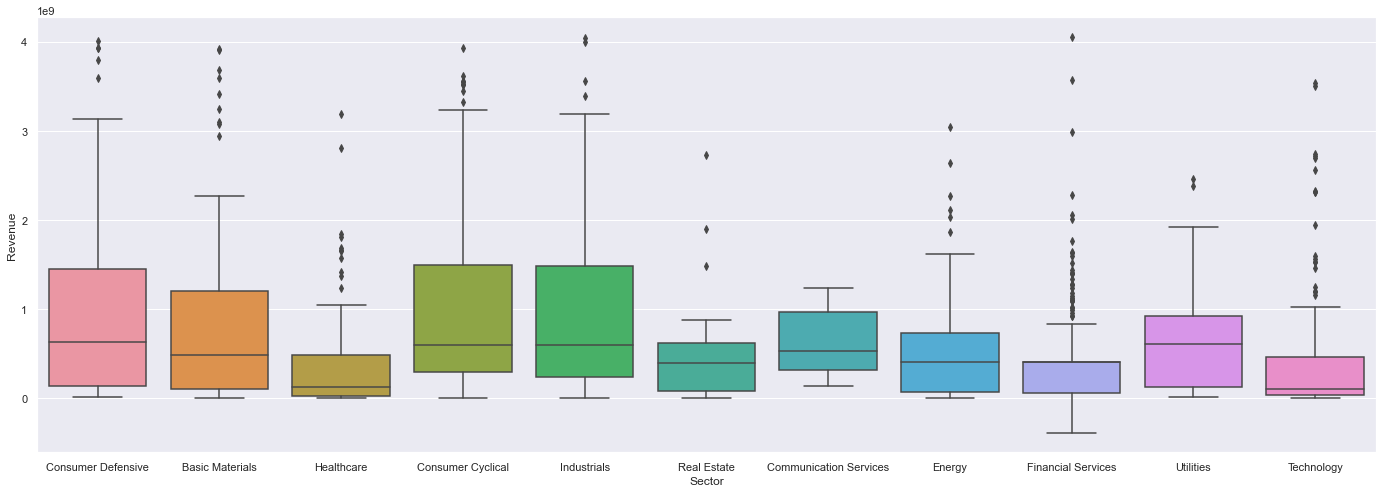

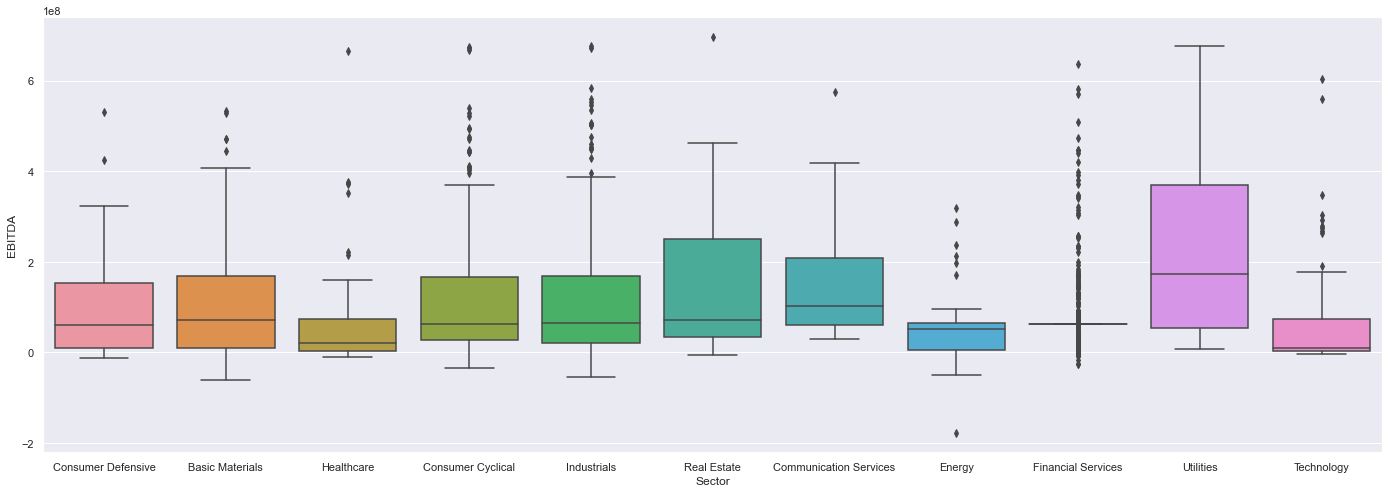

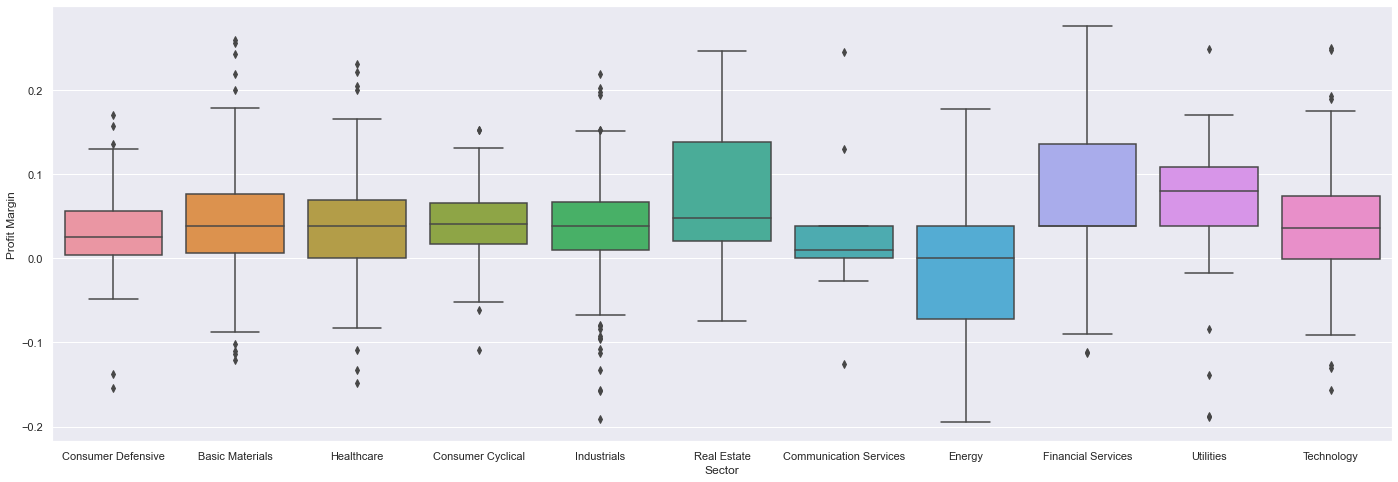

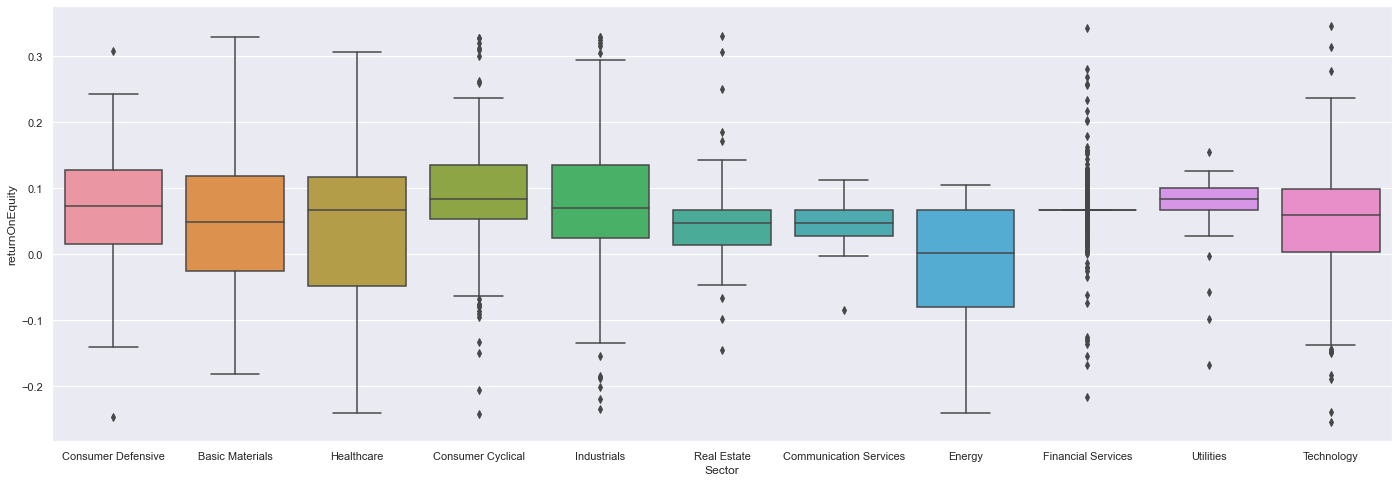

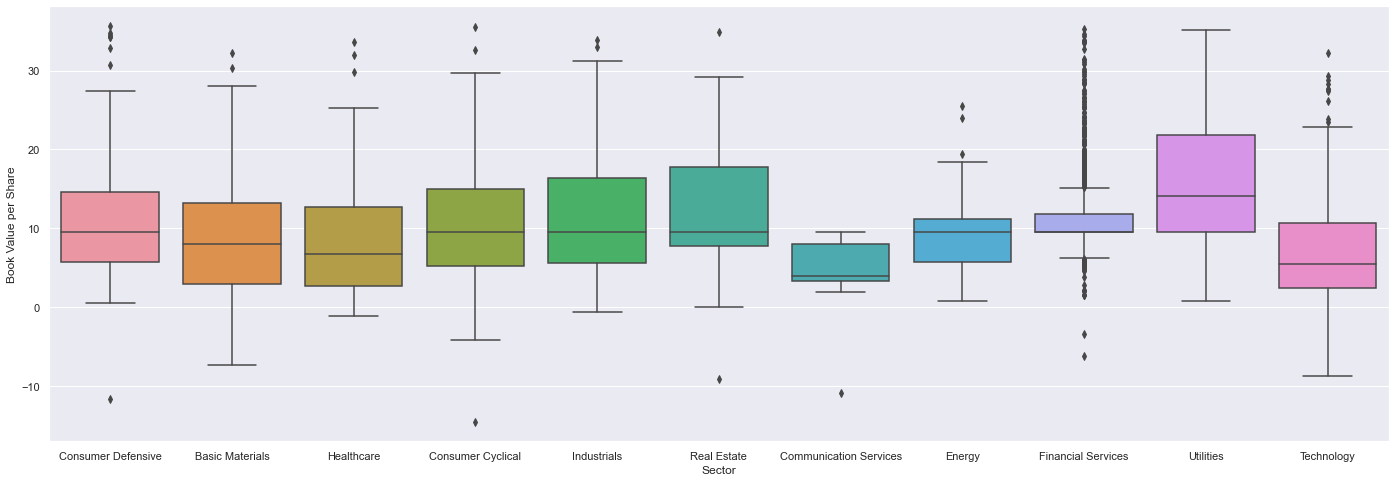

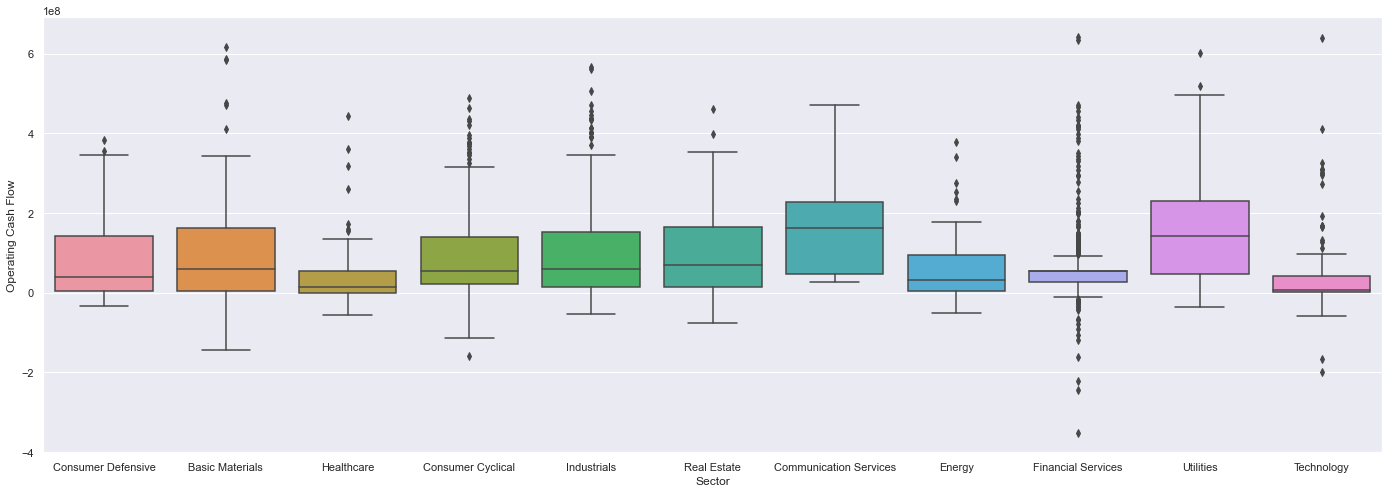

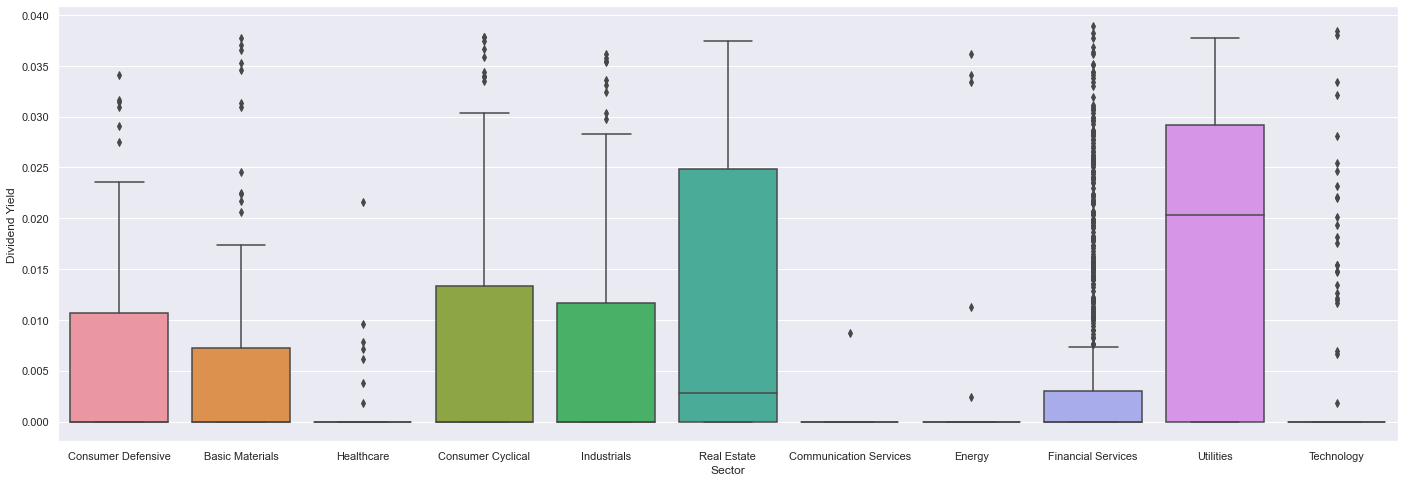

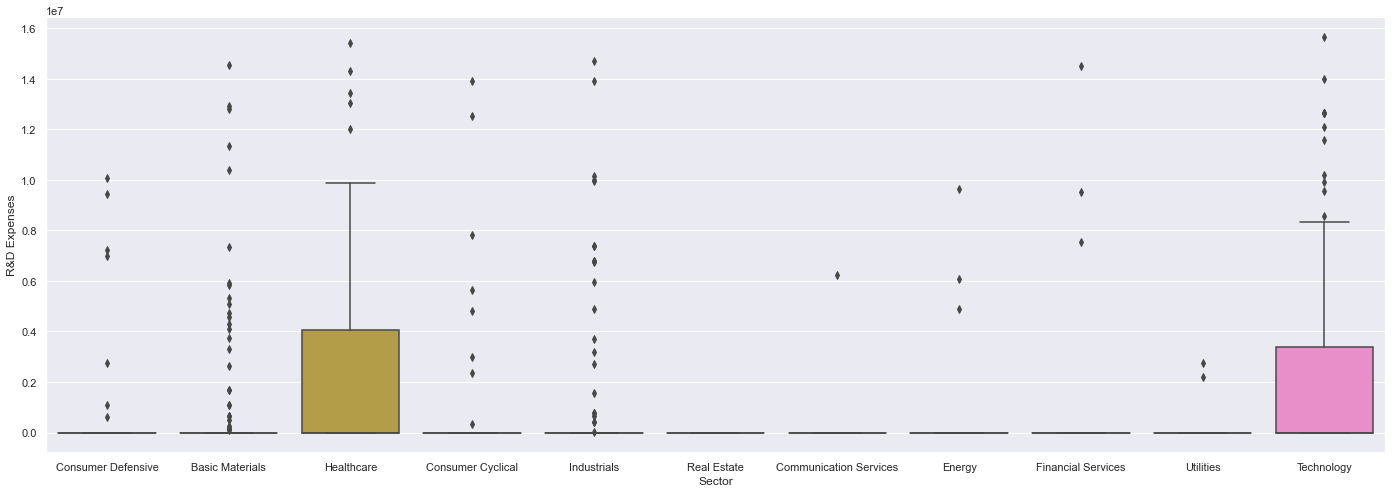

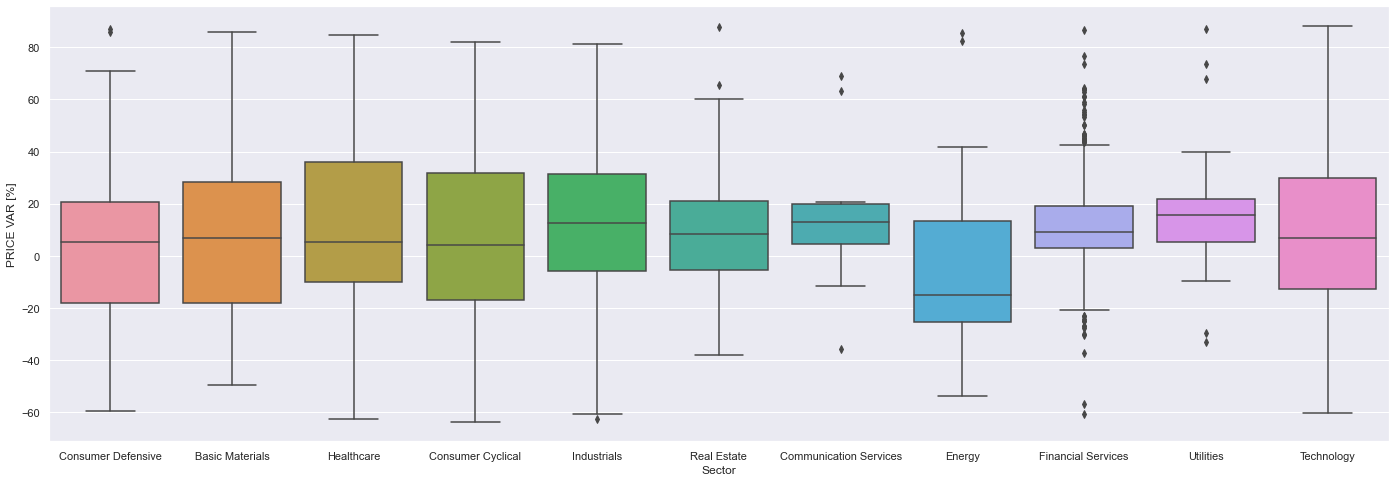

In [8]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 1, figsize=(24,8))
    sns.boxplot(x = 'Sector', y = factor, data = df, ax = axes)

In [9]:
# find percentage of stock that has 'buy' rating (Class = 1, PRICE VAR [%] > 0) in each Sector
for sector in df['Sector'].unique():
    buy_count = len(df.loc[(df['Class'] == 1) & (df['Sector'] == sector)])
    total_size = len(df.loc[df['Sector'] == sector])
    print(f'{sector} {round(100 * buy_count / total_size, 2)}%')

Consumer Defensive 60.53%
Basic Materials 55.0%
Healthcare 61.54%
Consumer Cyclical 57.61%
Industrials 67.97%
Real Estate 64.71%
Communication Services 81.82%
Energy 30.0%
Financial Services 81.43%
Utilities 86.49%
Technology 60.17%


## 2.2 Correlation Matrix

<AxesSubplot:>

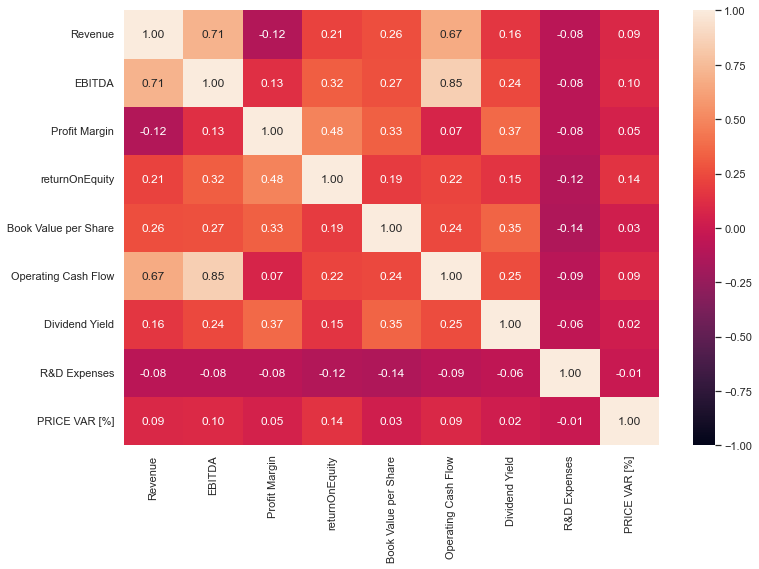

In [10]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

There is no strong correlation between one specific indicator with PRICE VAR [%].
So we will use ML models to only predict Buy/Sell (Class = 1/0) from these indicators.